In [1]:
#import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
#carregar dataset
base_dados = pd.read_csv('spotify_top_music.csv')

In [3]:
base_dados.head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [4]:
#renomear colunas
base_dados.columns = [
    'titulo', 'artista', 'genero_top', 'ano', 'bpm', 'energia', 'dança', 'decibeis',
    'ao_vivo', 'valencia', 'duracao', 'acustica', 'fala', 'popularidade'
]


In [5]:
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   titulo        603 non-null    object
 1   artista       603 non-null    object
 2   genero_top    603 non-null    object
 3   ano           603 non-null    int64 
 4   bpm           603 non-null    int64 
 5   energia       603 non-null    int64 
 6   dança         603 non-null    int64 
 7   decibeis      603 non-null    int64 
 8   ao_vivo       603 non-null    int64 
 9   valencia      603 non-null    int64 
 10  duracao       603 non-null    int64 
 11  acustica      603 non-null    int64 
 12  fala          603 non-null    int64 
 13  popularidade  603 non-null    int64 
dtypes: int64(11), object(3)
memory usage: 66.1+ KB


In [6]:
base_dados.describe()

,ano,bpm,energia,dança,decibeis,ao_vivo,valencia,duracao,acustica,fala,popularidade
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
mean,2014.592040,118.545605,70.504146,64.379768,-5.578773,17.774461,52.225539,224.674959,14.326700,8.358209,66.520730
std,2.607057,24.795358,16.310664,13.378718,2.798020,13.102543,22.513020,34.130059,20.766165,7.483162,14.517746
min,2010.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,134.000000,0.000000,0.000000,0.000000
25%,2013.000000,100.000000,61.000000,57.000000,-6.000000,9.000000,35.000000,202.000000,2.000000,4.000000,60.000000
50%,2015.000000,120.000000,74.000000,66.000000,-5.000000,12.000000,52.000000,221.000000,6.000000,5.000000,69.000000
75%,2017.000000,129.000000,82.000000,73.000000,-4.000000,24.000000,69.000000,239.500000,17.000000,9.000000,76.000000
max,2019.000000,206.000000,98.000000,97.000000,-2.000000,74.000000,98.000000,424.000000,99.000000,48.000000,99.000000


In [7]:
#verificar quantidade de generos diferentes e suas contagens
generos = base_dados['genero_top'].value_counts()
print(generos)


genero_top
dance pop                    327
pop                           60
canadian pop                  34
barbadian pop                 15
boy band                      15
electropop                    13
british soul                  11
big room                      10
canadian contemporary r&b      9
neo mellow                     9
art pop                        8
complextro                     6
australian dance               6
hip pop                        6
australian pop                 5
atl hip hop                    5
edm                            5
permanent wave                 4
latin                          4
hip hop                        4
colombian pop                  3
tropical house                 3
escape room                    2
acoustic pop                   2
indie pop                      2
detroit hip hop                2
candy pop                      2
downtempo                      2
brostep                        2
electronic trap                2

In [8]:
#quantide de artistas diferentes
artistas = base_dados['artista'].unique()
print(f"Quantidade de artistas diferentes: {len(artistas)}")

Quantidade de artistas diferentes: 184


In [9]:
#quantidade de musica lançadas por ano
musicas_por_ano = base_dados['ano'].value_counts().sort_index()
musicas_por_ano

ano
2010    51
2011    53
2012    35
2013    71
2014    58
2015    95
2016    80
2017    65
2018    64
2019    31
Name: count, dtype: int64

In [10]:
base_dados.groupby('artista')['popularidade'].sum().sort_values(ascending=False).head(10)


artista
Justin Bieber       1150
Maroon 5            1123
Katy Perry          1056
Rihanna              981
Lady Gaga            964
Bruno Mars           936
Ed Sheeran           862
Shawn Mendes         851
The Chainsmokers     839
Calvin Harris        782
Name: popularidade, dtype: int64

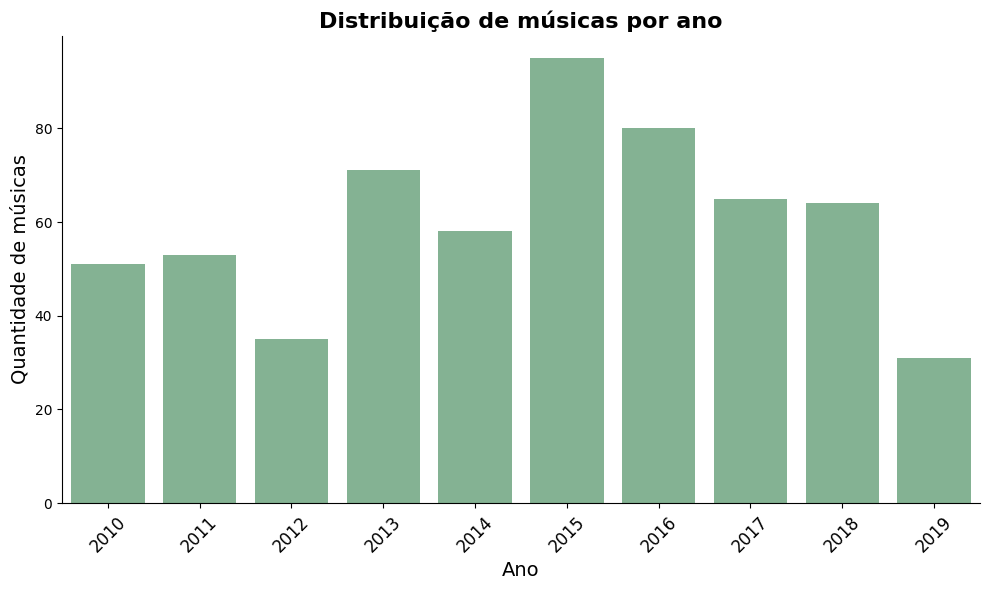

In [11]:
plt.figure(figsize=(10, 6))
sns.set_palette("crest")
sns.countplot(data=base_dados, x='ano')
plt.xticks(rotation=45, fontsize=12)
plt.title("Distribuição de músicas por ano", fontsize=16, fontweight='bold')
plt.xlabel("Ano", fontsize=14)
plt.ylabel("Quantidade de músicas", fontsize=14)
sns.despine()
plt.tight_layout()
plt.show()


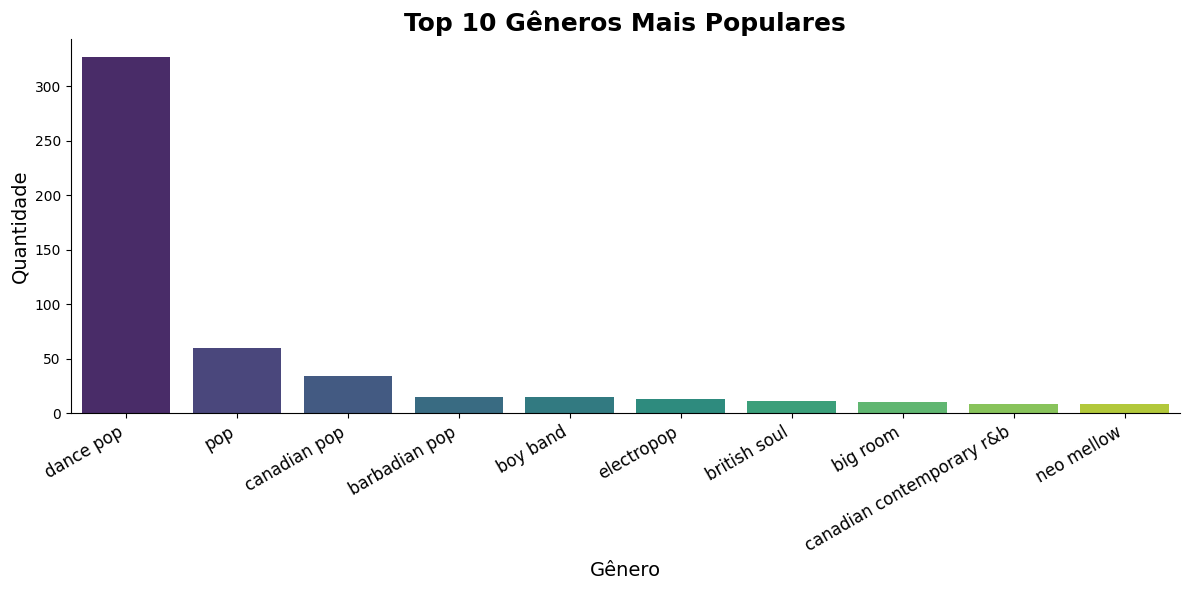

In [12]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x=base_dados['genero_top'].value_counts().head(10).index,
    y=base_dados['genero_top'].value_counts().head(10).values,
    palette='viridis'
)
plt.title('Top 10 Gêneros Mais Populares', fontsize=18, fontweight='bold')
plt.xlabel('Gênero', fontsize=14)
plt.ylabel('Quantidade', fontsize=14)
plt.xticks(rotation=30, ha='right', fontsize=12)
sns.despine()
plt.tight_layout()
plt.show()


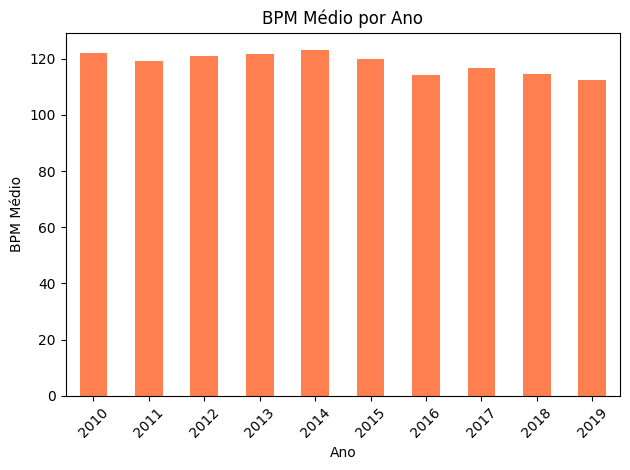

In [13]:
base_dados.groupby('ano')['bpm'].mean().plot(kind='bar', color='coral')
plt.title('BPM Médio por Ano')
plt.ylabel('BPM Médio')
plt.xlabel('Ano')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


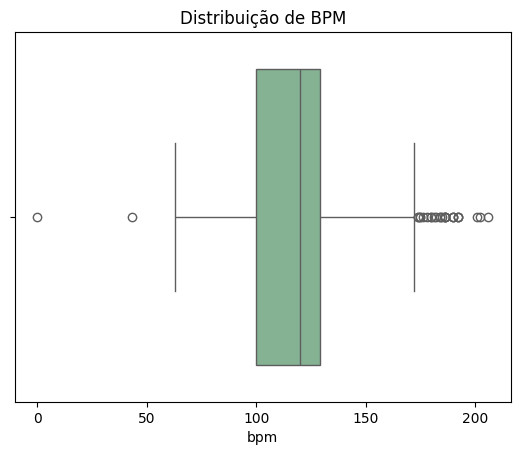

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=base_dados['bpm'])
plt.title("Distribuição de BPM")
plt.show()


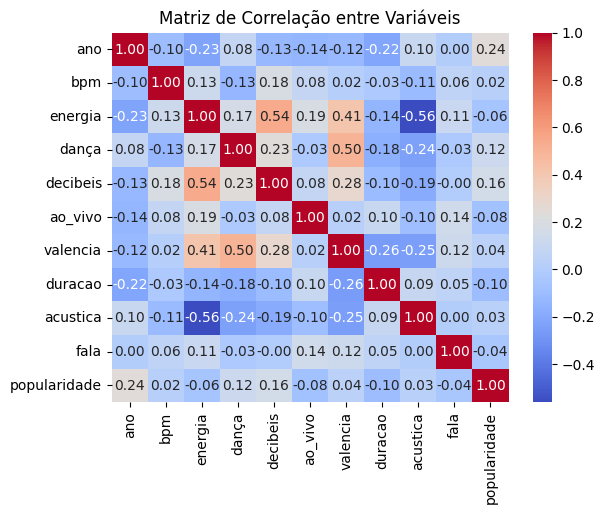

In [15]:
sns.heatmap(base_dados.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação entre Variáveis')
plt.show()

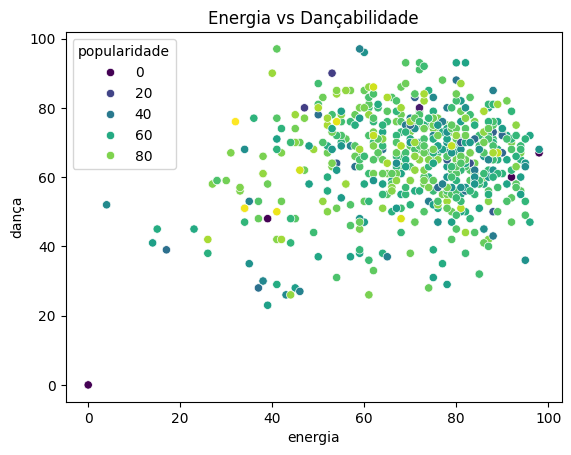

In [16]:
sns.scatterplot(data=base_dados, x='energia', y='dança', hue='popularidade', palette='viridis')
plt.title('Energia vs Dançabilidade')
plt.show()


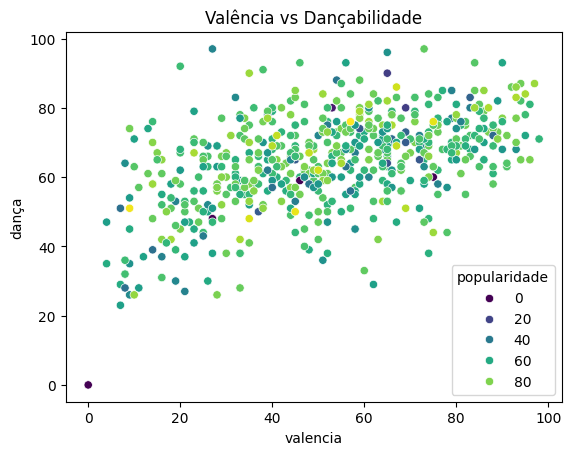

In [17]:
sns.scatterplot(data=base_dados, x='valencia', y='dança', hue='popularidade', palette='viridis')
plt.title('Valência vs Dançabilidade')
plt.show()


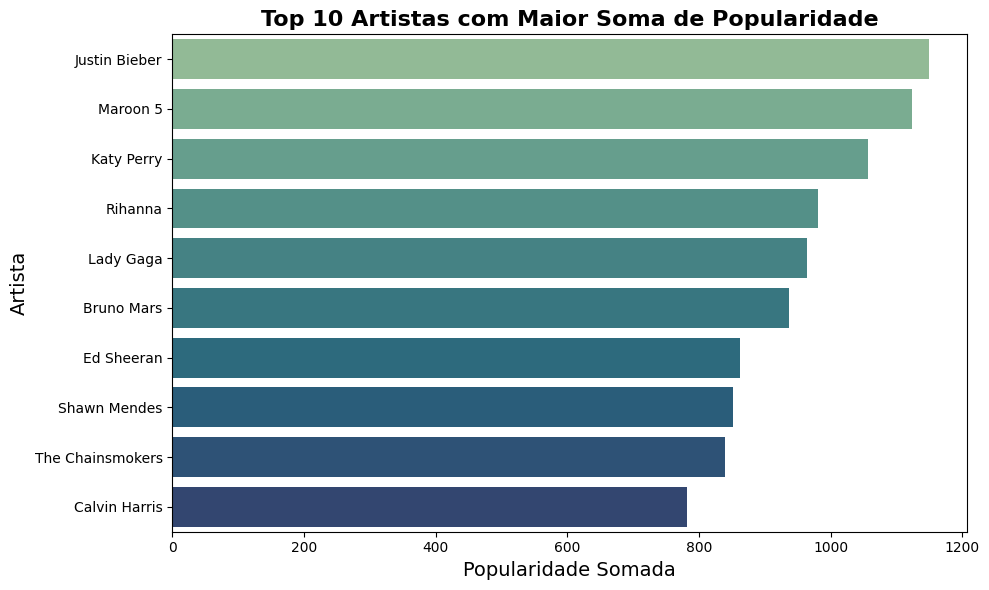

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x=base_dados.groupby('artista')['popularidade'].sum().sort_values(ascending=False).head(10).values,
    y=base_dados.groupby('artista')['popularidade'].sum().sort_values(ascending=False).head(10).index,
    palette='crest'
)
plt.title('Top 10 Artistas com Maior Soma de Popularidade', fontsize=16, fontweight='bold')
plt.xlabel('Popularidade Somada', fontsize=14)
plt.ylabel('Artista', fontsize=14)
plt.tight_layout()
plt.show()

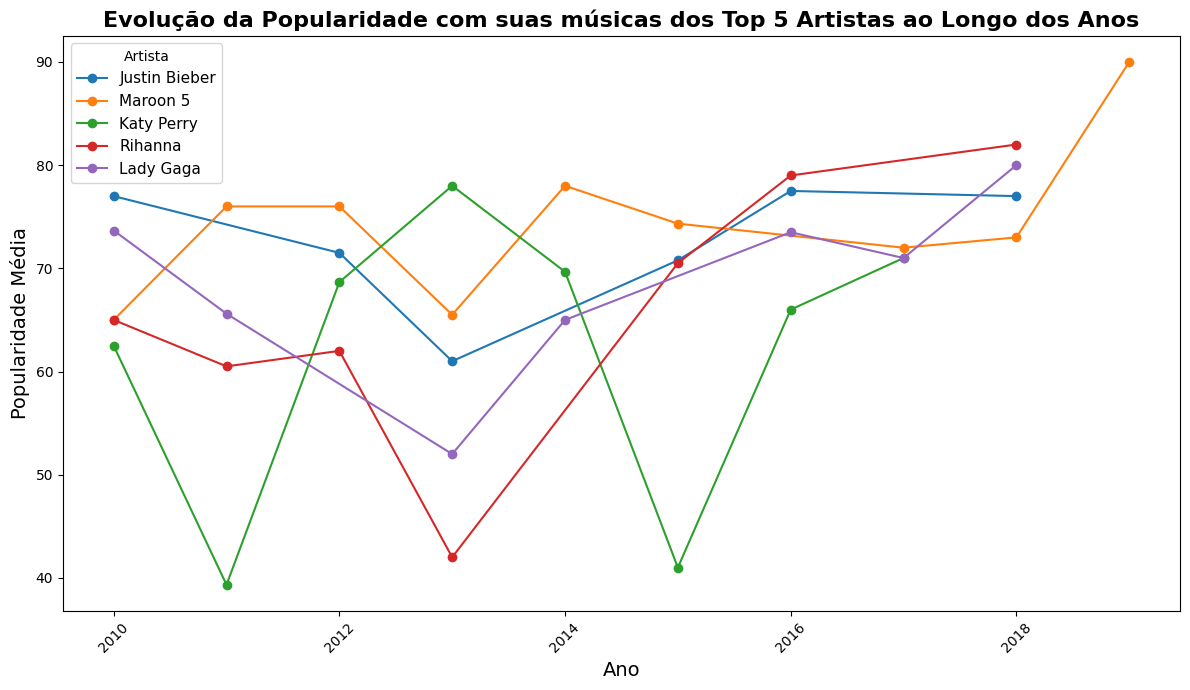

In [20]:
plt.figure(figsize=(12, 7))
sns.set_palette("tab10")
for artista in (
    base_dados.groupby('artista')['popularidade'].sum().sort_values(ascending=False).head(5).index
):
    base_dados[base_dados['artista'] == artista].groupby('ano')['popularidade'].mean().plot(
        marker='o', label=artista
    )
plt.title('Evolução da Popularidade com suas músicas dos Top 5 Artistas ao Longo dos Anos', fontsize=16, fontweight='bold')
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Popularidade Média', fontsize=14)
plt.legend(title='Artista', fontsize=11)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


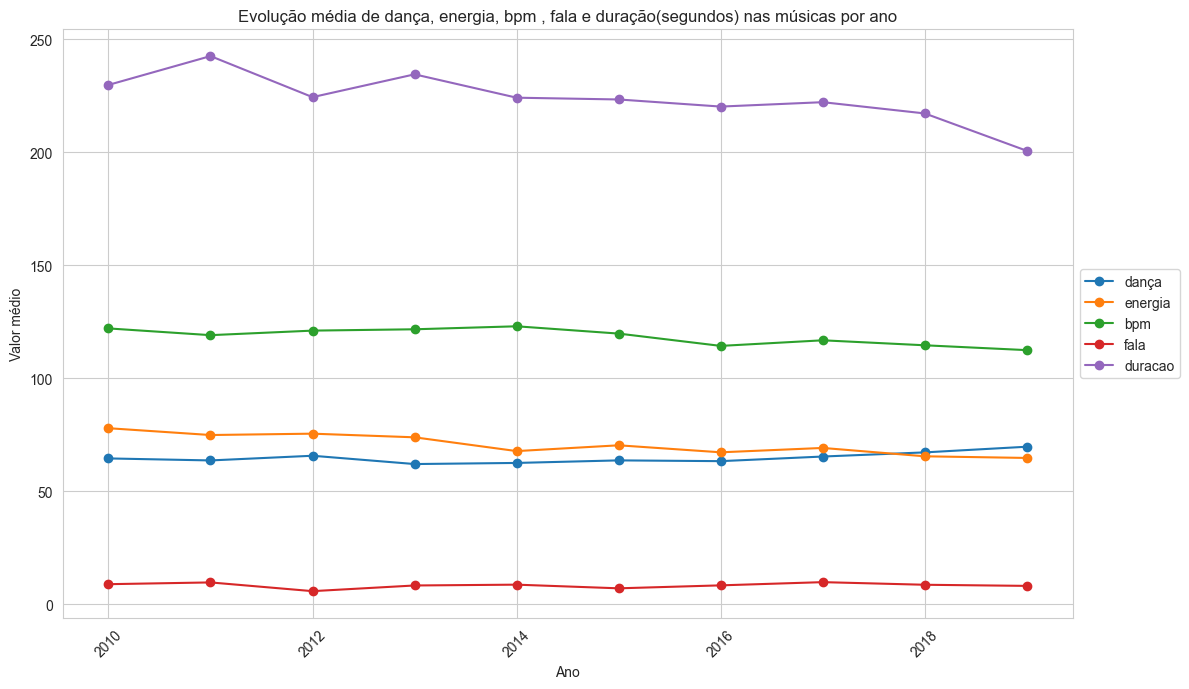

In [ ]:
df_evolucao = base_dados.groupby('ano')[['dança', 'energia', 'bpm', 'fala','duracao']].mean().reset_index()
plt.figure(figsize=(12, 7))
for coluna in ['dança', 'energia', 'bpm', 'fala','duracao']:
    plt.plot(df_evolucao['ano'], df_evolucao[coluna], marker='o', label=coluna)
plt.title("Evolução média de dança, energia, bpm , fala e duração(segundos) nas músicas por ano")
plt.xlabel("Ano")
plt.ylabel("Valor médio")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


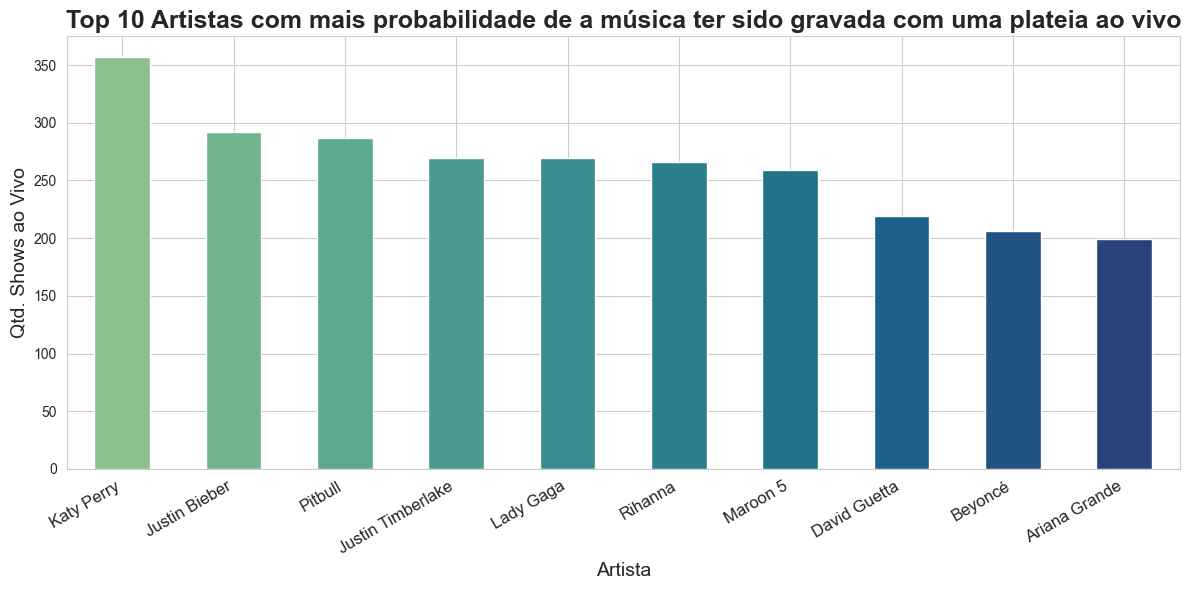

In [ ]:
plt.figure(figsize=(12, 6))
(
    base_dados.groupby('artista')['ao_vivo']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .plot(kind='bar', color=sns.color_palette('crest', 10))
)
plt.title('Top 10 Artistas com mais probabilidade de a música ter sido gravada com uma plateia ao vivo', fontsize=18, fontweight='bold')
plt.xlabel('Artista', fontsize=14)
plt.ylabel('Qtd. Shows ao Vivo', fontsize=14)
plt.xticks(rotation=30, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

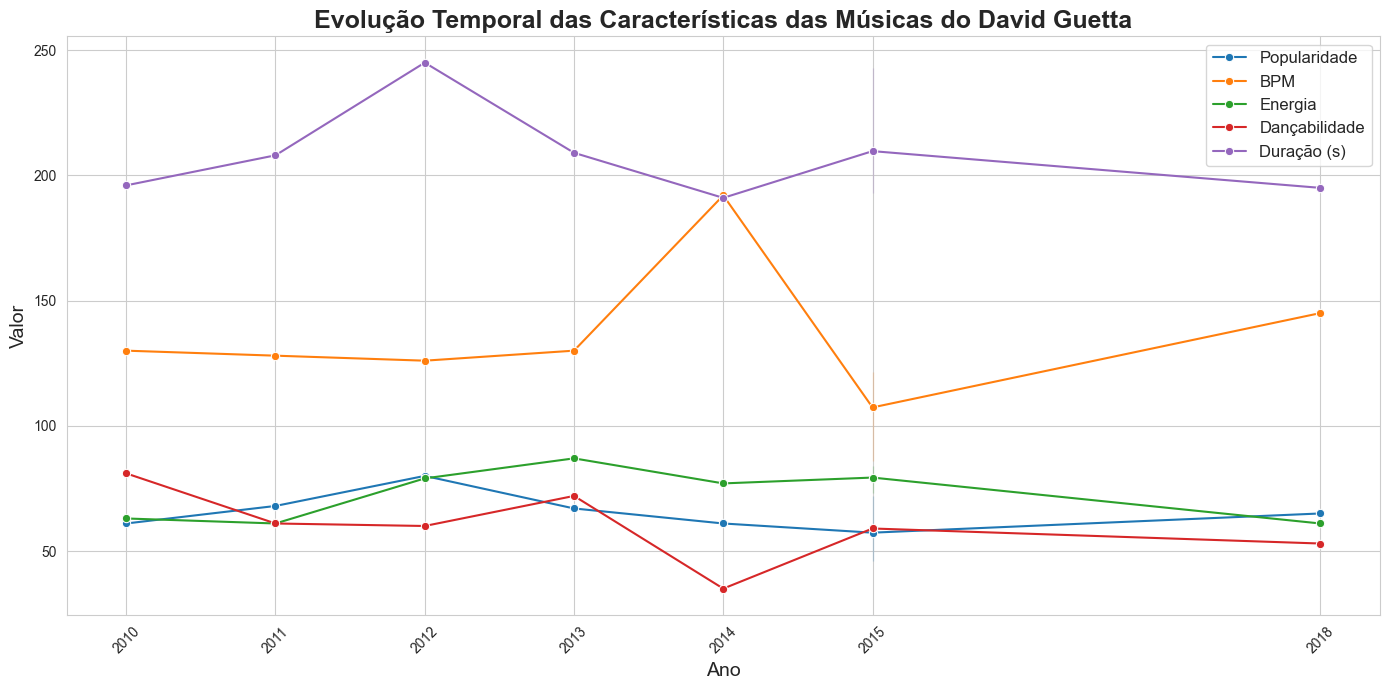

      popularidade     bpm  energia  dança  duracao
ano                                                
2010         61.00  130.00    63.00   81.0   196.00
2011         68.00  128.00    61.00   61.0   208.00
2012         80.00  126.00    79.00   60.0   245.00
2013         67.00  130.00    87.00   72.0   209.00
2014         61.00  192.00    77.00   35.0   191.00
2015         57.33  107.33    79.33   59.0   209.67
2018         65.00  145.00    61.00   53.0   195.00


In [ ]:
# Análise temporal detalhada das músicas da Lady Gaga
dados_artista = base_dados[base_dados['artista'] == 'David Guetta']

plt.figure(figsize=(14, 7))
sns.lineplot(data=dados_artista, x='ano', y='popularidade', marker='o', label='Popularidade')
sns.lineplot(data=dados_artista, x='ano', y='bpm', marker='o', label='BPM')
sns.lineplot(data=dados_artista, x='ano', y='energia', marker='o', label='Energia')
sns.lineplot(data=dados_artista, x='ano', y='dança', marker='o', label='Dançabilidade')
sns.lineplot(data=dados_artista, x='ano', y='duracao', marker='o', label='Duração (s)')

plt.title('Evolução Temporal das Características das Músicas do David Guetta', fontsize=18, fontweight='bold')
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Valor', fontsize=14)
plt.legend(fontsize=12)
plt.xticks(sorted(dados_artista['ano'].unique()), rotation=45)
plt.tight_layout()
plt.show()

# Estatísticas por ano
print(dados_artista.groupby('ano')[['popularidade', 'bpm', 'energia', 'dança', 'duracao']].mean().round(2))